# TERM PROJECT
>**<p style="font-size:20px">INDEX</p><br>**
    >   1. Dataset<br>
    >   2. Object & Purpose<br>
    >   3. Schedule<br>
    >   4. Description<br>

***
***

## 1. DataSet
**[E-commerce Shipping Data](https://www.kaggle.com/datasets/prachi13/customer-analytics)**

>*This is the data of Product Shipment Tracking
>*The data set has 12 atrributes and 10999 data 
    
**Dataset Attributes**

1. **ID**: ID Number of Customers.
2. **Warehouse block**: The Company have big Warehouse which is divided in to block such as A, B, C, D, F.
3. **Mode of shipment**: The Company Ships the products in multiple way such as Ship, Flight and Road.
4. **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.
5. **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. **Cost of the product**: Cost of the Product in US Dollars.
7. **Prior purchases**: The Number of Prior Purchase.
8. **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.
9. **Gender**: Male and Female.
10. **Discount offered**: Discount offered on that specific product.
11. **Weight in gms**: It is the weight in grams.
12. **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.
***

## 2. Object & Purpose

**Reached.on.Time_Y.N**
    
    The target is “Reached.on.Time_Y.N”. Reached.on.Time_Y.N represents 1 if the product was reached on time, and 0 if it was not reached on time. Other features allow us to predict whether a product will reach on time. If it is predicted that it cannot be reached on time, it can guide customers again, which will help the business.
***

## 3. Schedule
This project would get **every MONDAY 20:00**<br>
***

## 4. Description
1. import libraries and data-set
2. check missing value & describe data
3. change categorical value (LabelEncoder)
4. show statistical chart
5. scaling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("ecommerce.csv")
#data = pd.read_csv('C:/Users/kbg/Desktop/데이터과학/team project/Train.csv')
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
data.shape

(10999, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
data.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

no need to treat null value(there isn't null value)

### Target, NonTarget Define

In [7]:
target_feature = 'Reached.on.Time_Y.N' # resulting target
target_range = [0, 1] # range of target
other_feature = ['Warehouse_block', 
                'Mode_of_Shipment',
                'Customer_care_calls',
                'Customer_rating',
                'Cost_of_the_Product',
                'Prior_purchases',
                'Product_importance',
                'Gender',
                'Discount_offered',
                'Weight_in_gms'
                 ]

### Drop Outlier

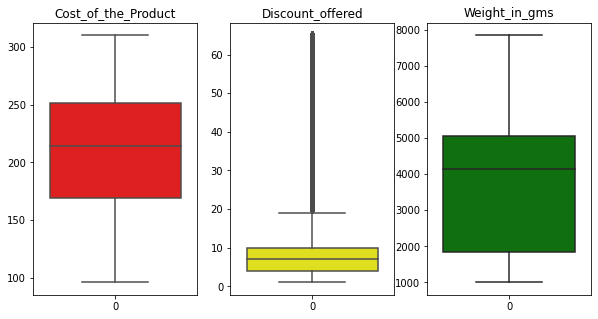

In [8]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols = 3, figsize = (10,5))
ax1.set_title('Cost_of_the_Product')
ax2.set_title('Discount_offered')
ax3.set_title('Weight_in_gms')

sns.boxplot(data = data['Cost_of_the_Product'], color = 'red', ax = ax1)
sns.boxplot(data = data['Discount_offered'], color = 'yellow', ax = ax2)
sns.boxplot(data = data['Weight_in_gms'], color = 'green', ax = ax3)

plt.show()

    Discount_offered : there is outlier up 20

In [9]:
# def : drop outlier algorithms
# Input : feature of dataframe
# return : index of outlier, type numpy array 
def IQR(data) :
    q1 = np.percentile(data, 25) # percentile : what is the value on 25 percent
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    low_outlier = q1 - (iqr*1.5)
    high_outlier = q3 + (iqr*1.5)
    index = np.where((data > high_outlier) | (data < low_outlier))
    print('IQR : ', iqr)
    print('Low outlier : ' , low_outlier)
    print('High outlier : ', high_outlier)
    
    return index

In [10]:
# find outlier of discount offered
Discount_offered_outlier_index = IQR(data['Discount_offered'])[0] # [0] is important
Discount_offered_outlier_index

IQR :  6.0
Low outlier :  -5.0
High outlier :  19.0


array([   0,    1,    2, ..., 3131, 3132, 3133], dtype=int64)

In [11]:
data.drop(index = Discount_offered_outlier_index, inplace = True) # drop outlier
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


### Make histogram 

In [12]:
# def : make histogram number of feature value according to each categorical target feature
# input : target feature, features without target, target range, whole dataframe
def makehist_countft_bytg(tg_name,ft_name,tg_range,data):
    fig, axes = plt.subplots(1, len(tg_range),sharex = True, sharey = True, figsize=(22,5)) #make fig    
    fig.suptitle(ft_name)
    axes_cnt = 0
    for i in tg_range:
        data_per_target = data[data[tg_name] == i]
        data_per_target = data_per_target[ft_name] 
        axes[axes_cnt].hist(data_per_target, bins = 10)
        axes[axes_cnt].grid(True)
        axes[axes_cnt].set_title(tg_name +" = " + str(i))
        axes_cnt = axes_cnt + 1
    plt.show()

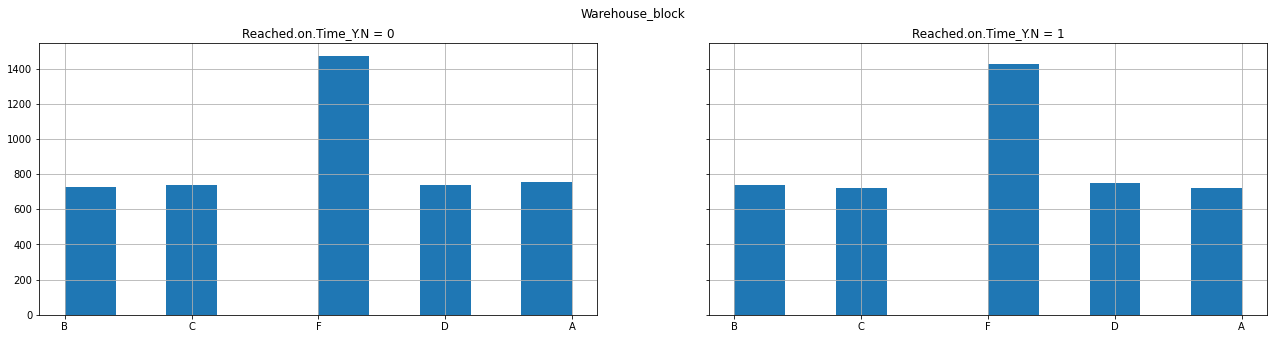

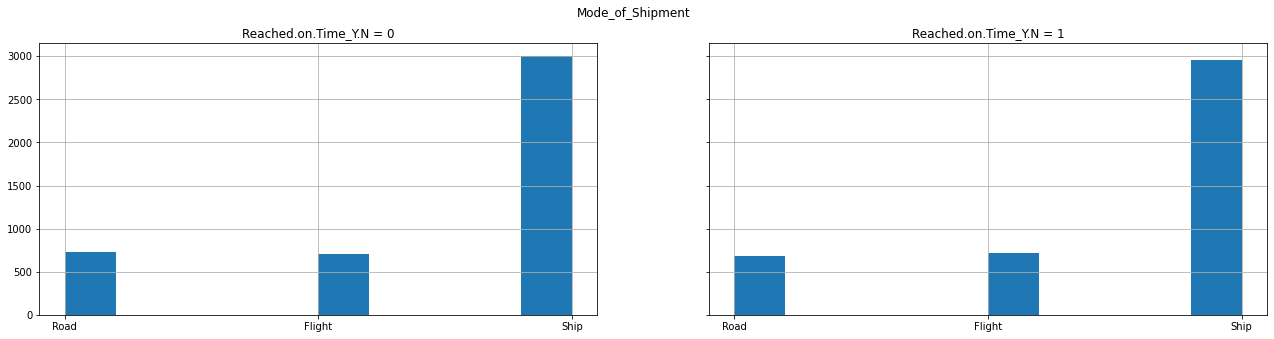

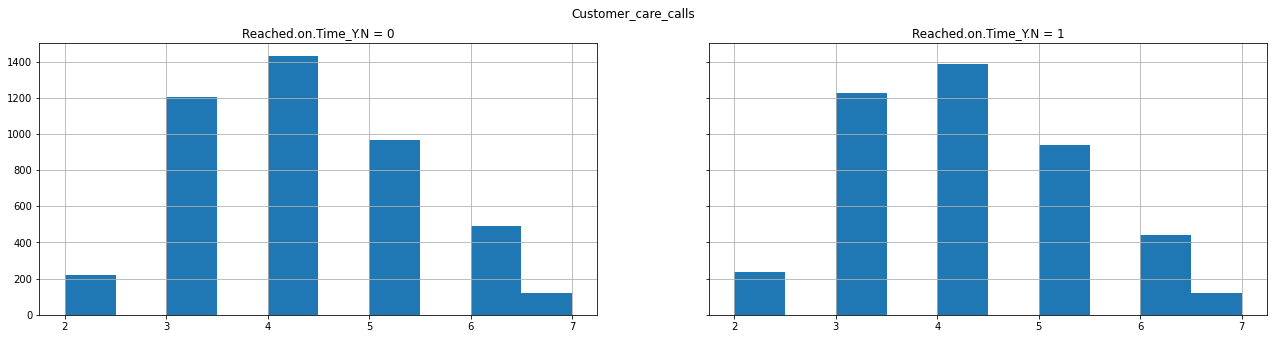

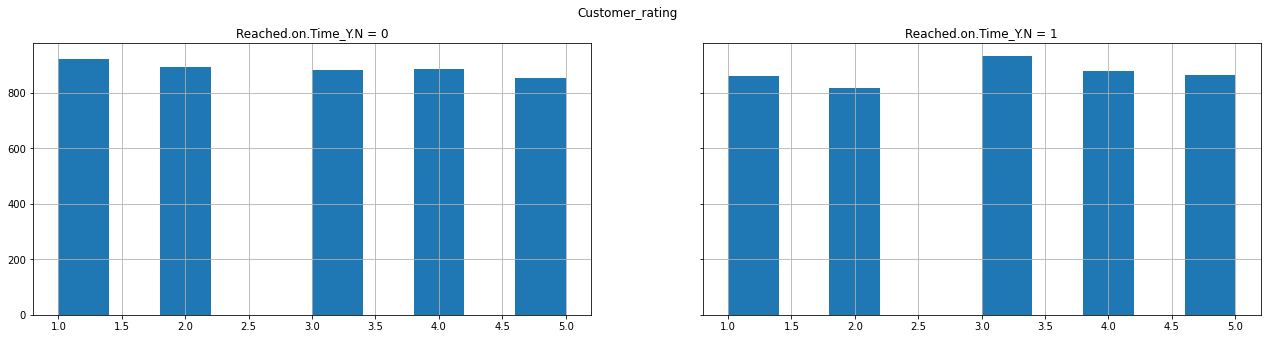

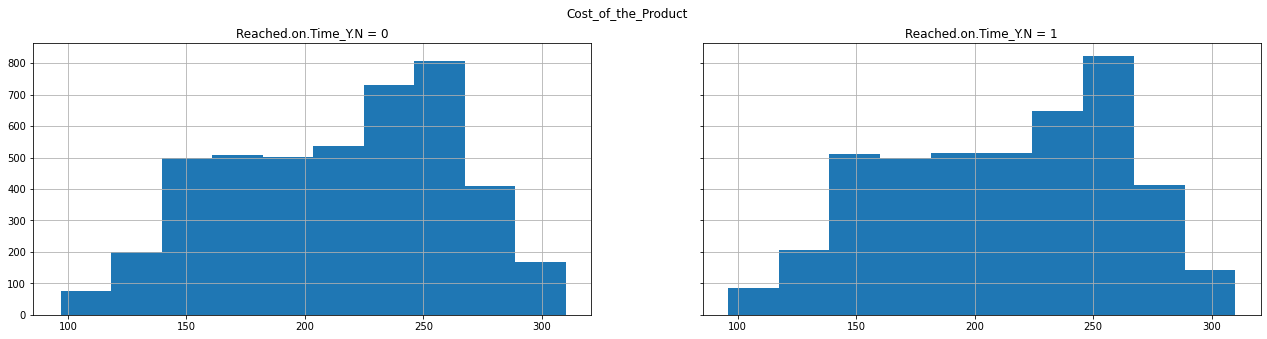

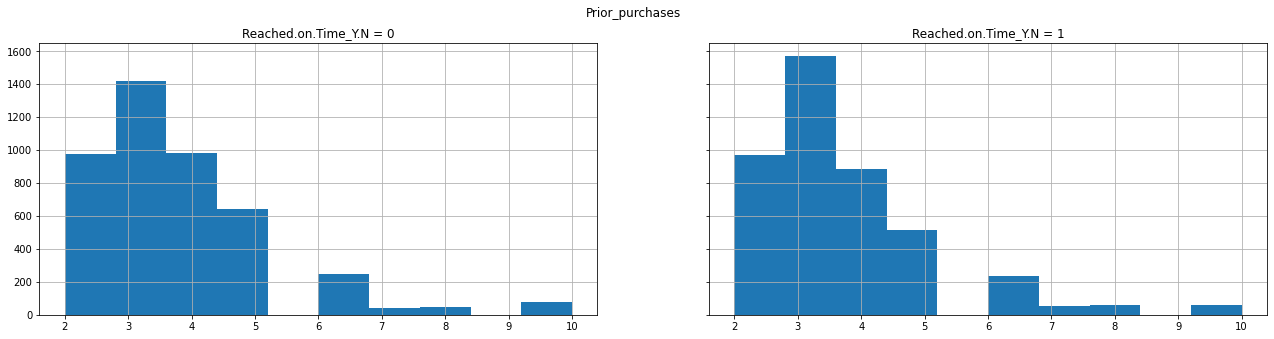

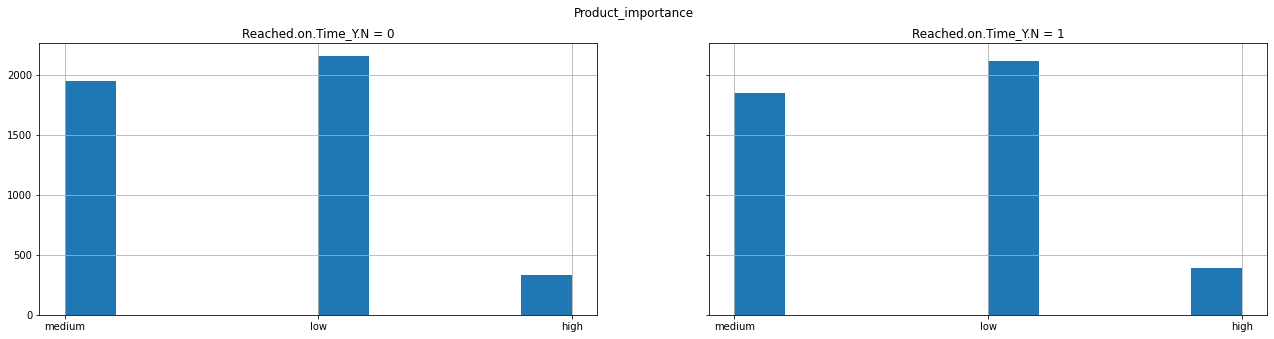

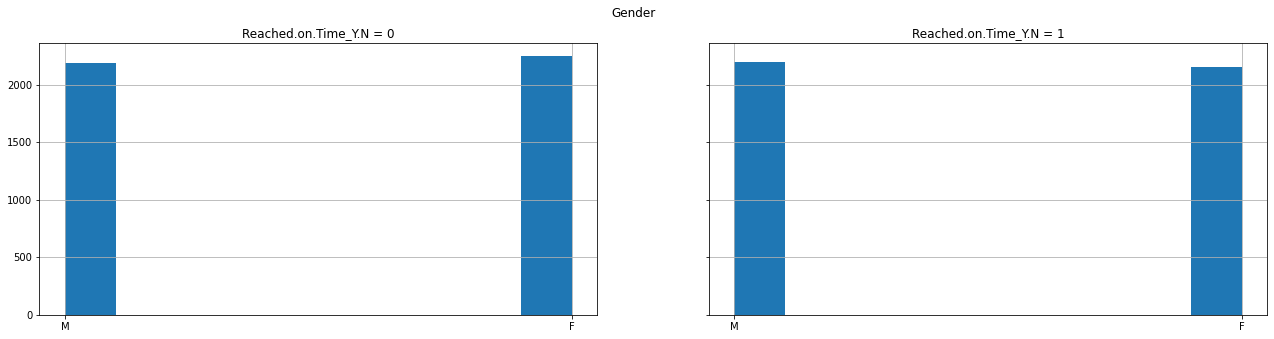

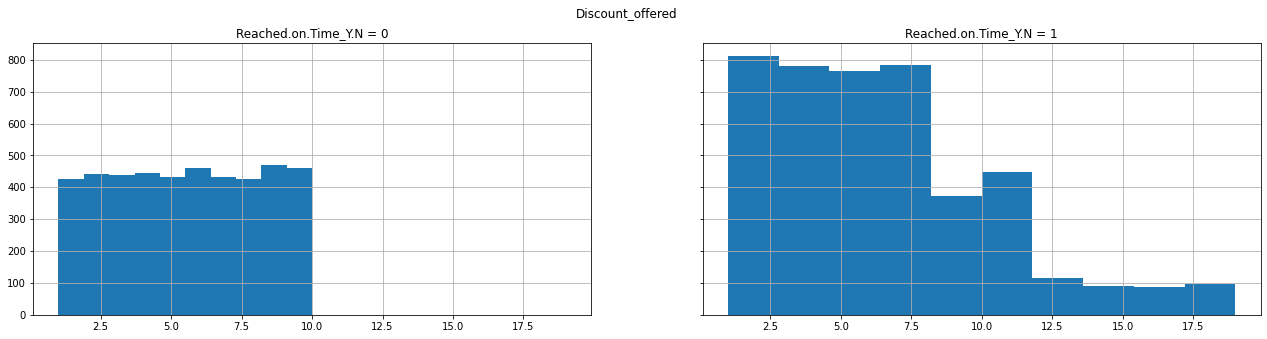

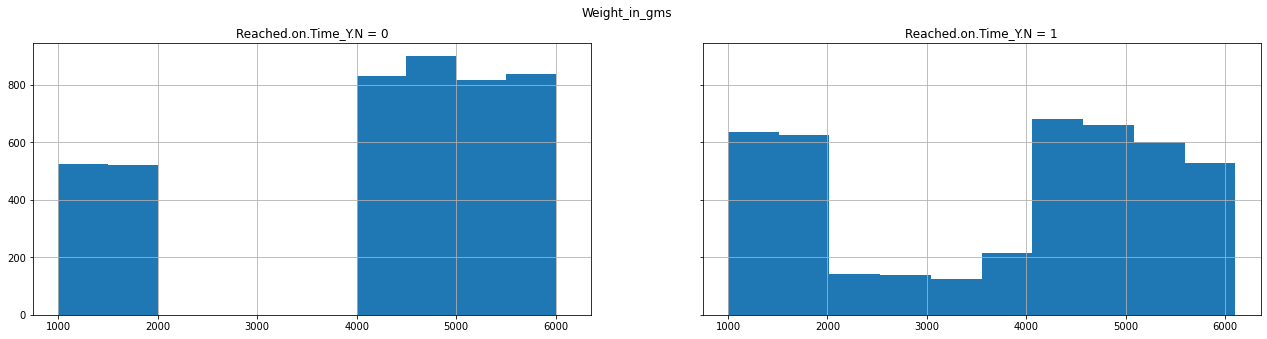

In [13]:
for i in other_feature:
    makehist_countft_bytg(target_feature,i,target_range,data)

### Correlation

<AxesSubplot:>

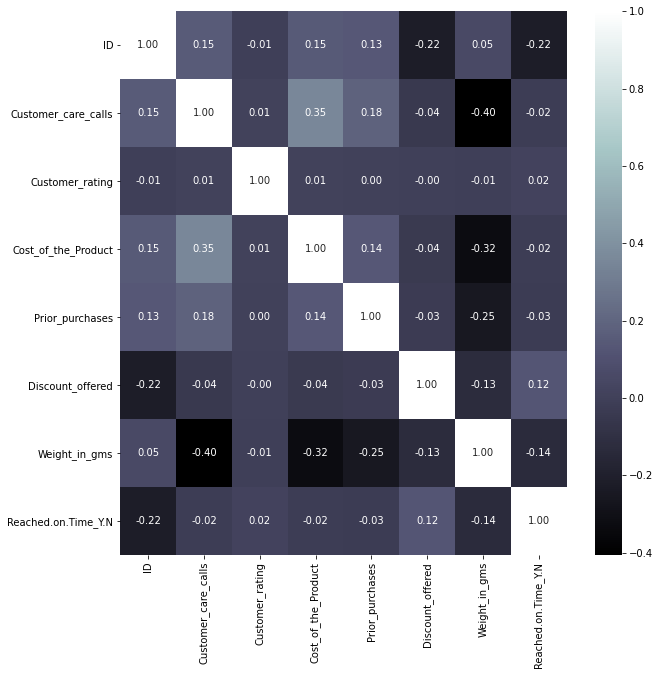

In [14]:
# heatmap corrleation
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'bone')

### Change Categorical data

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()
cateogical_feature_name = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for feature_name in cateogical_feature_name:
    data[feature_name] = label_encoder.fit_transform(data[feature_name])
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,4,1,0,3,3,176,4,2,1,10,1177,1
5,6,4,0,3,1,162,3,2,0,12,1417,1
6,7,3,0,3,4,250,3,1,0,3,2371,1
8,9,0,0,3,4,150,3,1,0,11,1861,1
10,11,2,0,3,4,189,2,2,1,12,2888,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0
10997,10998,4,2,5,2,223,6,2,1,2,1210,0


### Scaling def

In [17]:
from sklearn import preprocessing

In [18]:
scaling_target = [
                'Customer_care_calls',
                'Cost_of_the_Product',
                'Prior_purchases',
                'Discount_offered',
                'Weight_in_gms'
                 ]
scaling_df = pd.DataFrame(data, columns = scaling_target)
scaling_df

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
3,3,176,4,10,1177
5,3,162,3,12,1417
6,3,250,3,3,2371
8,3,150,3,11,1861
10,3,189,2,12,2888
...,...,...,...,...,...
10994,4,252,5,1,1538
10995,4,232,5,6,1247
10996,5,242,5,4,1155
10997,5,223,6,2,1210


In [19]:
# def : scaling data using Standard, minmax, robust
# input : target of scaling feature
# return : dataframe after scaling
def Scaling(data):
    std_Scaler = preprocessing.StandardScaler()
    scaled_df = std_Scaler.fit_transform(data)
    scaled_df = pd.DataFrame(scaled_df, columns = scaling_target, index = data.index)
    
    mam_Scaler = preprocessing.MinMaxScaler()
    scaled_df_m = mam_Scaler.fit_transform(data)
    scaled_df_m = pd.DataFrame(scaled_df_m, columns = scaling_target, index = data.index)
    
    rb_Scaler = preprocessing.RobustScaler()
    scaled_df_r = rb_Scaler.fit_transform(data)
    scaled_df_r = pd.DataFrame(scaled_df_r, columns = scaling_target, index = data.index)
    
    return scaled_df, scaled_df_m, scaled_df_r

In [20]:
standardDF, minmaxDF, robustDF = Scaling(scaling_df)

robustDF # 기존 data index 와 맞춰주지 않고 DF 를 만들면 다시 기존 dataframe 에 합칠때 충돌 발생

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
3,-0.5,-0.543210,1.0,0.8,-1.012293
5,-0.5,-0.716049,0.0,1.2,-0.939445
6,-0.5,0.370370,0.0,-0.6,-0.649871
8,-0.5,-0.864198,0.0,1.0,-0.804674
10,-0.5,-0.382716,-1.0,1.2,-0.492943
...,...,...,...,...,...
10994,0.0,0.395062,2.0,-1.0,-0.902717
10995,0.0,0.148148,2.0,0.0,-0.991046
10996,0.5,0.271605,2.0,-0.4,-1.018971
10997,0.5,0.037037,3.0,-0.8,-1.002277


In [21]:
standardDF

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
3,-0.970013,-0.785046,0.242925,1.142258,-1.712137
5,-0.970013,-1.076270,-0.417753,1.709851,-1.564028
6,-0.970013,0.754277,-0.417753,-0.844319,-0.975298
8,-0.970013,-1.325890,-0.417753,1.426054,-1.290028
10,-0.970013,-0.514625,-1.078432,1.709851,-0.656249
...,...,...,...,...,...
10994,-0.111361,0.795880,0.903604,-1.411913,-1.489357
10995,-0.111361,0.379847,0.903604,0.007071,-1.668938
10996,0.747291,0.587864,0.903604,-0.560523,-1.725713
10997,0.747291,0.192632,1.564283,-1.128116,-1.691772


In [22]:
minmaxDF

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
3,0.2,0.373832,0.250,0.500000,0.034503
5,0.2,0.308411,0.125,0.611111,0.081553
6,0.2,0.719626,0.125,0.111111,0.268575
8,0.2,0.252336,0.125,0.555556,0.168594
10,0.2,0.434579,0.000,0.611111,0.369927
...,...,...,...,...,...
10994,0.4,0.728972,0.375,0.000000,0.105273
10995,0.4,0.635514,0.375,0.277778,0.048226
10996,0.6,0.682243,0.375,0.166667,0.030190
10997,0.6,0.593458,0.500,0.055556,0.040972


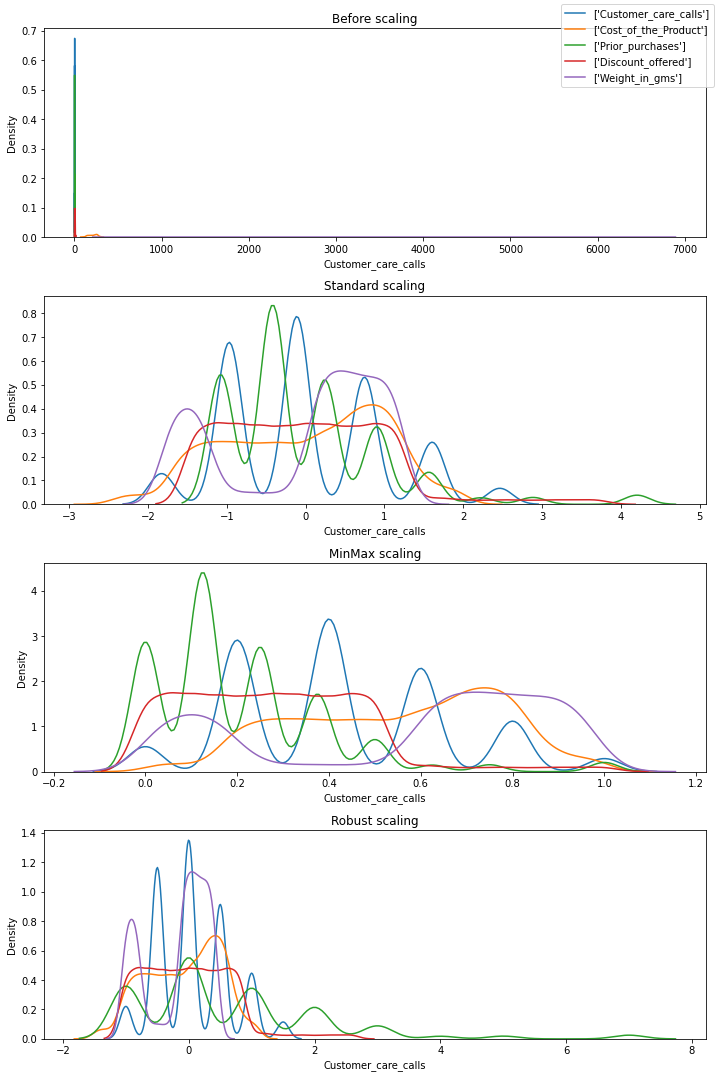

In [23]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (10,15))
ax1.set_title('Before scaling')
ax2.set_title('Standard scaling')
ax3.set_title('MinMax scaling')
ax4.set_title('Robust scaling')

for features in scaling_target :
    sns.kdeplot(data[features], label = [features], ax = ax1)
    sns.kdeplot(standardDF[features], ax = ax2)
    sns.kdeplot(minmaxDF[features], ax = ax3)
    sns.kdeplot(robustDF[features], ax = ax4)
    

plt.tight_layout()
fig.legend()
plt.show()

### KNN classificiation

In [24]:
def DF(original_data, scaling_data) :
    df_after_scaling = pd.DataFrame(original_data, index = original_data.index)    
    df_after_scaling[scaling_target] = scaling_data[scaling_target]
    
    return df_after_scaling

In [25]:
from sklearn.model_selection import train_test_split
# Pease install module named mglearn
# pip install mglearn
# conda install mglearn
df_robust = DF(data, robustDF)

In [26]:
df_robust

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,4,1,0,-0.5,3,-0.543210,1.0,2,1,0.8,-1.012293,1
5,6,4,0,-0.5,1,-0.716049,0.0,2,0,1.2,-0.939445,1
6,7,3,0,-0.5,4,0.370370,0.0,1,0,-0.6,-0.649871,1
8,9,0,0,-0.5,4,-0.864198,0.0,1,0,1.0,-0.804674,1
10,11,2,0,-0.5,4,-0.382716,-1.0,2,1,1.2,-0.492943,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,0.0,1,0.395062,2.0,2,0,-1.0,-0.902717,1
10995,10996,1,2,0.0,1,0.148148,2.0,2,0,0.0,-0.991046,0
10996,10997,2,2,0.5,4,0.271605,2.0,1,0,-0.4,-1.018971,0
10997,10998,4,2,0.5,2,0.037037,3.0,2,1,-0.8,-1.002277,0


In [27]:
# Sspearate Training Data set and test Data set to evalutate generalization performance
# create a dataframe except the target col
# In this shell, we use data set after Robust Scaling = 'robustDF'

# target_feature = Reached.on.Time
# X is the Training Data
X= df_robust.drop(columns=[target_feature])

In [29]:
# Seperate target value
y = data[target_feature].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,
                                                   stratify = y)


In [31]:
# Build the Model
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors = 3)

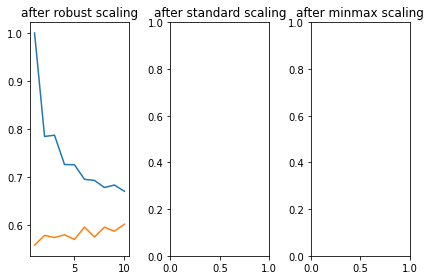

0.6018202502844141


In [32]:
training_accuracy = []
test_accuracy = []

for n_neighbors in range(1,11):
    knn = KNeighborsClassifier(n_neighbors).fit(X, y)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

fig, ax = plt.subplots(1,3)
ax[0].plot(range(1,11), training_accuracy, label="training accuracy")
ax[0].plot(range(1,11), test_accuracy, label="test accuracy")
ax[0].set_title('after robust scaling')


#ax[1].plot(range(1,11), training_accuracy2, label="training accuracy")
#ax[1].plot(range(1,11), test_accuracy2, label="test accuracy")
ax[1].set_title('after standard scaling')

#ax[2].plot(range(1,11), training_accuracy3, label="training accuracy")
#ax[2].plot(range(1,11), test_accuracy3, label="test accuracy")
ax[2].set_title('after minmax scaling')


plt.tight_layout()
plt.show()

print(knn.score(X_test, y_test))

In [33]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,4,1,0,-0.5,3,-0.543210,1.0,2,1,0.8,-1.012293,1
5,6,4,0,-0.5,1,-0.716049,0.0,2,0,1.2,-0.939445,1
6,7,3,0,-0.5,4,0.370370,0.0,1,0,-0.6,-0.649871,1
8,9,0,0,-0.5,4,-0.864198,0.0,1,0,1.0,-0.804674,1
10,11,2,0,-0.5,4,-0.382716,-1.0,2,1,1.2,-0.492943,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,0.0,1,0.395062,2.0,2,0,-1.0,-0.902717,1
10995,10996,1,2,0.0,1,0.148148,2.0,2,0,0.0,-0.991046,0
10996,10997,2,2,0.5,4,0.271605,2.0,1,0,-0.4,-1.018971,0
10997,10998,4,2,0.5,2,0.037037,3.0,2,1,-0.8,-1.002277,0
